<a href="https://colab.research.google.com/github/najouaelfethi/Chatbot-Friends/blob/main/chatbot_friends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importation des bibliotheques

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.express import bar
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from nltk.stem import PorterStemmer, WordNetLemmatizer



nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
!pip install textblob


In [ ]:
df = pd.read_csv("/dataset.csv")
data = df.copy()
data.head()

,text,speaker,season,episode,scene,utterance
0,There's nothing to tell! He's just some guy I ...,Monica Geller,1,1,1,1
1,"C'mon, you're going out with the guy! There's ...",Joey Tribbiani,1,1,1,2
2,"All right Joey, be nice. So does he have a hum...",Chandler Bing,1,1,1,3
3,"Wait, does he eat chalk?",Phoebe Buffay,1,1,1,4
4,"(They all stare, bemused.)",Scene Directions,1,1,1,5


In [ ]:
data.tail()

,text,speaker,season,episode,scene,utterance
67368,"Oh, it's gonna be okay.",Chandler Bing,10,18,11,17
67369,Do you guys have to go to the new house right ...,Rachel Green,10,18,11,18
67370,We got some time.,Monica Geller,10,18,11,19
67371,"Okay, should we get some coffee?",Rachel Green,10,18,11,20
67372,Sure. Where?,Chandler Bing,10,18,11,21


**Preparation des donnees**

**1. Analyse Exploratoire des donnees**

1.1 Analyse de forme

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67373 entries, 0 to 67372
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   text         67373 non-null  object 
 1   speaker      67097 non-null  object 
 2   season       67373 non-null  int64  
 3   episode      67373 non-null  int64  
 4   scene        67373 non-null  int64  
 5   utterance    67373 non-null  int64  
 6   len_text     67373 non-null  int64  
 7   len_speaker  67097 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 4.1+ MB


In [ ]:
#Nombre de lignes et de colonnes
num_rows = data.shape[0]
num_cols = data.shape[1]
print("Nombre de lignes:",num_rows)
print("Nombre de colonnes:",num_cols)

Nombre de lignes: 67373
Nombre de colonnes: 6


In [ ]:
#Type de donnes
data.dtypes

text         object
speaker      object
season        int64
episode       int64
scene         int64
utterance     int64
dtype: object

In [ ]:
#statistics
data.describe()

,season,episode,scene,utterance
count,67373.000000,67373.000000,67373.000000,67373.000000
mean,5.438069,12.608241,6.858831,18.079557
std,2.788974,6.962668,4.285814,21.145387
min,1.000000,1.000000,1.000000,0.000000
25%,3.000000,7.000000,3.000000,6.000000
50%,5.000000,13.000000,6.000000,12.000000
75%,8.000000,19.000000,10.000000,22.000000
max,10.000000,25.000000,29.000000,255.000000


In [ ]:
data.shape[1]

6

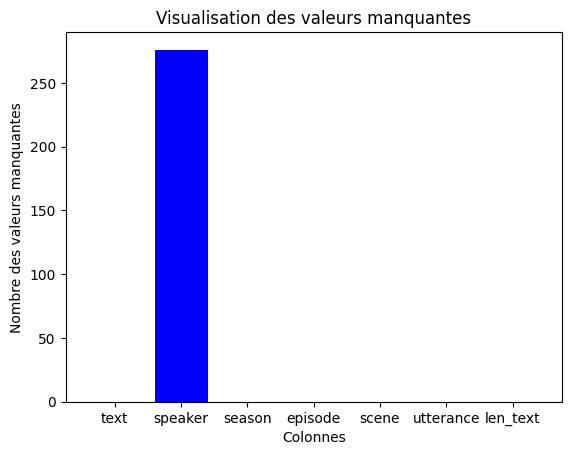

In [ ]:
#Calculation du pourcentage des valeurs manquantes
missing_values = data.isnull().sum()
plt.bar(missing_values.index,missing_values.values, color='Blue')
plt.xlabel("Colonnes")
plt.ylabel("Nombre des valeurs manquantes")
plt.title("Visualisation des valeurs manquantes")
plt.show()

1.2 Analyse de fond

1.2.1 Analyse univarie

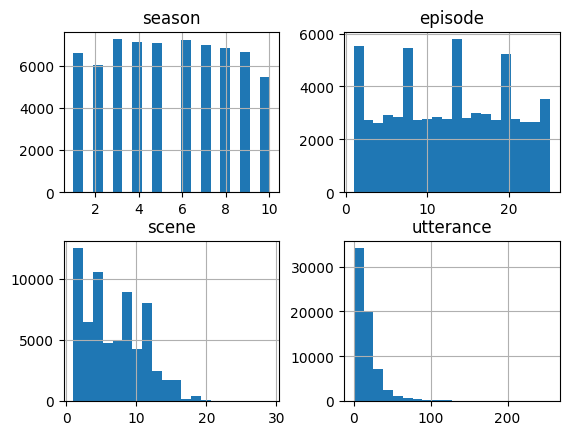

In [ ]:
#Visualisation des variables
#Pour les donnees numeriques
numeric_cols = ["season","episode","scene","utterance"]
data[numeric_cols].hist(bins=20)
plt.show()


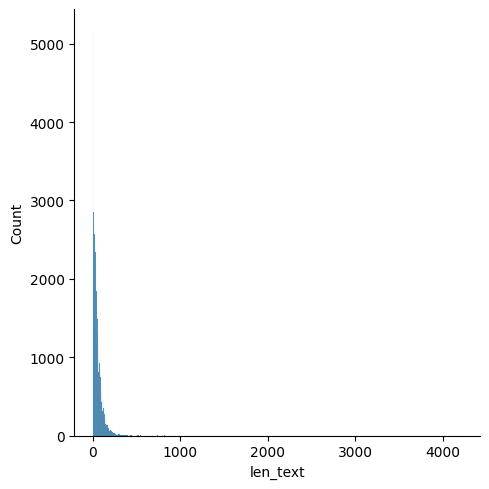

In [ ]:
#Pour la colonne text
data['len_text'] = data['text'].str.len()
sns.displot(data['len_text'])
plt.show()


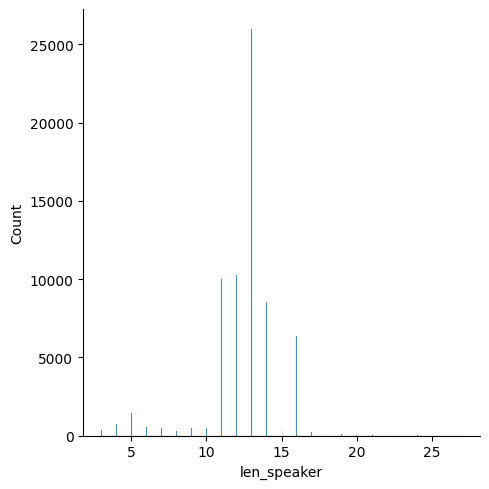

In [ ]:
#Pour la colonne speaker
data['len_speaker'] = data['speaker'].str.len()
sns.displot(data['len_speaker'])
plt.show()


1.2.2 Analyse bivarie

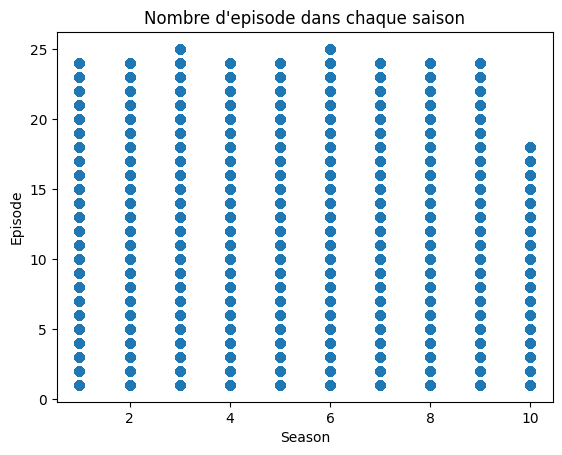

In [ ]:
#Pour les deux colonnes season et episode
plt.scatter(data['season'], data['episode'])
plt.xlabel('Season')
plt.ylabel('Episode')
plt.title("Nombre d'episode dans chaque saison")
plt.show()

In [ ]:
#Nombre de speakers dans chaque season
bar(data_frame=data[['season','speaker']].groupby(by=['season','speaker']).size().reset_index().rename({0:'count'}, axis=1), x='speaker',y='count',color='season')


In [ ]:
#Top 7 speakers dans chaque saison
speakers = data['speaker'].value_counts().to_frame().reset_index().head(6)['speaker'].values
top_speakers = data[data['speaker'].isin(speakers)]
bar(data_frame=top_speakers[['season','speaker']].groupby(by=['season','speaker']).size().reset_index().rename({0:'count'}, axis=1), x='speaker',y='count',color='season')


1.2.3 Analyse multivarie

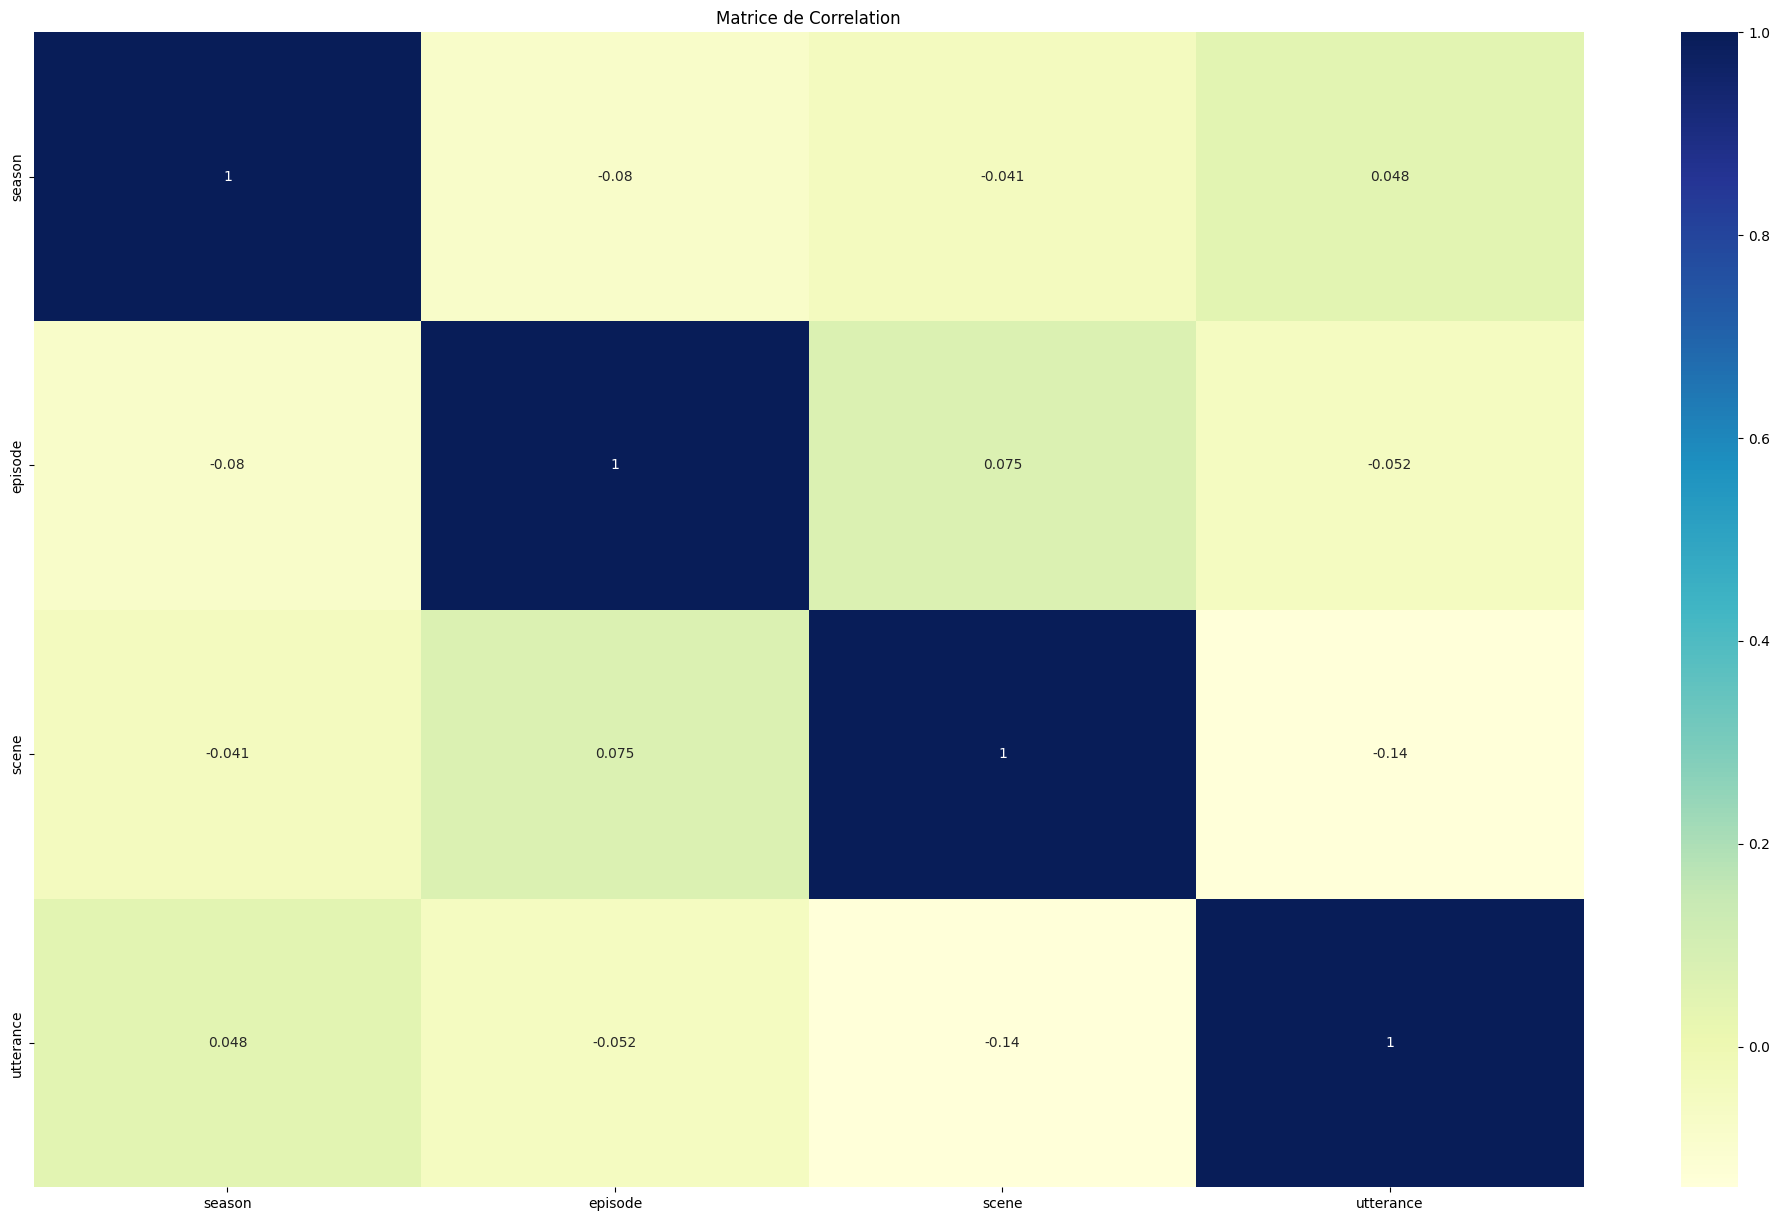

In [ ]:
matrice = data[numeric_cols].corr()
plt.figure(figsize=(25, 15))
sns.heatmap(matrice, annot=True,cmap='YlGnBu')
plt.title('Matrice de Correlation')
plt.show()


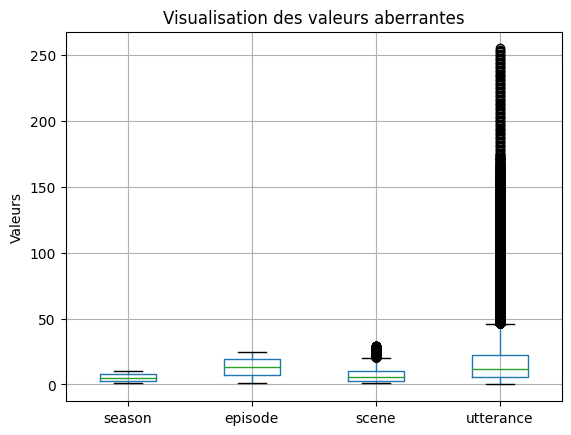

In [ ]:
#Visualisation des valeurs aberrantes
data.boxplot(numeric_cols)
plt.ylabel("Valeurs")
plt.title("Visualisation des valeurs aberrantes")
plt.show()

**2. Pre-traitement**

2.1 Nettoyage des donnees

In [ ]:
#Filling in missing values
data.fillna(0, inplace=True)

In [ ]:
#Functions
def lowercase(text):
  return text.lower()

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_stopwords(tokens):
    words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in words]
    return filtered_tokens

def tokenization(text):
    return word_tokenize(text)

def correct_spelling(text):
  textblob = TextBlob(text)
  correction = str(textblob.correct())
  return correction

def lemmatize(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

def remove_numerical(text):
    return ''.join([char for char in text if not char.isdigit()])


In [ ]:
#Fonction principale
def pretraitement(text):
    text = lowercase(text)
    text = remove_punctuation(text)
    tokens = tokenization(text)
    tokens = remove_stopwords(tokens)
    tokens = lemmatize(tokens)
    return tokens
text = data['text'][0]
speaker = data['speaker'][1]
pretraitement(text)


'there nothing tell he guy work'

In [ ]:
#Wordcloud

Text Vectorization

In [ ]:
#One hot encoding

2.2 Reduction des dimenssions

2.3 Transformation des donnees

2.4 Division des donnees train set/test set